In [94]:
import os
import zipfile

In [95]:
path_to_zip = '/content/drive/MyDrive/Colab Notebooks/FakePhotos.zip'
if not os.path.isfile(path_to_zip):
  print('not a file')

In [96]:
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall("new_dataset")

In [97]:
path_to_dataset = '/content/new_dataset'

In [98]:
os.listdir(path_to_dataset)

['train.csv', 'rvf10k', 'valid.csv']

In [99]:
os.listdir(os.path.join(path_to_dataset, 'rvf10k', 'train', 'real'))

['41399.jpg',
 '53196.jpg',
 '24936.jpg',
 '07130.jpg',
 '37829.jpg',
 '53708.jpg',
 '05392.jpg',
 '06684.jpg',
 '02384.jpg',
 '12224.jpg',
 '54519.jpg',
 '38936.jpg',
 '42419.jpg',
 '11255.jpg',
 '39035.jpg',
 '12200.jpg',
 '02700.jpg',
 '25180.jpg',
 '42514.jpg',
 '43277.jpg',
 '06543.jpg',
 '59995.jpg',
 '20577.jpg',
 '49097.jpg',
 '05140.jpg',
 '41034.jpg',
 '55738.jpg',
 '30670.jpg',
 '42018.jpg',
 '57825.jpg',
 '05478.jpg',
 '36613.jpg',
 '42849.jpg',
 '26823.jpg',
 '15638.jpg',
 '61891.jpg',
 '57746.jpg',
 '23348.jpg',
 '29485.jpg',
 '66165.jpg',
 '34527.jpg',
 '00009.jpg',
 '21080.jpg',
 '48703.jpg',
 '00789.jpg',
 '10034.jpg',
 '09523.jpg',
 '58813.jpg',
 '61154.jpg',
 '25711.jpg',
 '47087.jpg',
 '53894.jpg',
 '16025.jpg',
 '05530.jpg',
 '38100.jpg',
 '03055.jpg',
 '08362.jpg',
 '67766.jpg',
 '62095.jpg',
 '31370.jpg',
 '22743.jpg',
 '04147.jpg',
 '33874.jpg',
 '25266.jpg',
 '15543.jpg',
 '27372.jpg',
 '48768.jpg',
 '60867.jpg',
 '50577.jpg',
 '01804.jpg',
 '40643.jpg',
 '6986

In [100]:
os.path.join(path_to_dataset, 'rvf10k', 'train', 'real')

'/content/new_dataset/rvf10k/train/real'

In [101]:
for dir in os.listdir(os.path.join(path_to_dataset, 'rvf10k')):
  dir_path = os.path.join(path_to_dataset, 'rvf10k', dir)
  if not os.path.isdir(dir_path):
    continue
  for sub_dir in os.listdir(dir_path):
    sub_dir_path = os.path.join(dir_path, sub_dir)
    if not os.path.isdir(sub_dir_path):
      continue
    count = sum(1 for f in os.listdir(sub_dir_path) if os.path.isfile(os.path.join(sub_dir_path, f)))
    print(f'{dir_path}/{sub_dir}: {count}')

/content/new_dataset/rvf10k/valid/real: 1500
/content/new_dataset/rvf10k/valid/fake: 1500
/content/new_dataset/rvf10k/train/real: 3500
/content/new_dataset/rvf10k/train/fake: 3500


In [102]:
train_path = os.path.join(path_to_dataset, 'rvf10k', 'train')
test_path = os.path.join(path_to_dataset, 'rvf10k', 'test')
os.listdir(train_path)

['real', 'fake']

In [103]:
def remove_ds_store(root_path):
    removed = 0
    for dirpath, dirnames, filenames in os.walk(root_path):
        for file in filenames:
            if file == '.DS_Store':
                file_path = os.path.join(dirpath, file)
                try:
                    os.remove(file_path)
                    removed += 1
                    print(f"Removed: {file_path}")
                except Exception as e:
                    print(f"Failed to remove {file_path}: {e}")
    if removed == 0:
        print("✅ No .DS_Store files found.")
    else:
        print(f"🧹 Removed {removed} .DS_Store files.")


remove_ds_store(train_path)
remove_ds_store(test_path)

✅ No .DS_Store files found.
✅ No .DS_Store files found.


In [104]:
import pandas as pd

In [105]:
traindf = pd.read_csv('/content/new_dataset/train.csv')
testdf = pd.read_csv('/content/new_dataset/valid.csv')

In [106]:
traindf.head()

,Unnamed: 0,original_path,id,label,label_str,path
0,1052,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,28609,1,real,train/real/28609.jpg
1,13406,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,30395,1,real,train/real/30395.jpg
2,16376,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,22430,1,real,train/real/22430.jpg
3,31373,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,58380,1,real,train/real/58380.jpg
4,21034,/kaggle/input/flickrfaceshq-dataset-nvidia-par...,62044,1,real,train/real/62044.jpg


In [107]:
traindf_clean = traindf[['path', 'label', 'label_str']].copy()
testdf_clean = testdf[['path', 'label', 'label_str']].copy()

traindf_clean.rename(columns={'path': 'image', 'label_str': 'manipulation_labels'}, inplace=True)
testdf_clean.rename(columns={'path': 'image', 'label_str': 'manipulation_labels'}, inplace=True)

traindf_clean['image'] = traindf_clean['image'].apply(lambda x: os.path.join('/content/new_dataset/rvf10k/', x))
testdf_clean['image'] = testdf_clean['image'].apply(lambda x: os.path.join('/content/new_dataset/rvf10k/', x))

In [108]:
traindf_clean.head(n=3)

,image,label,manipulation_labels
0,/content/new_dataset/rvf10k/train/real/28609.jpg,1,real
1,/content/new_dataset/rvf10k/train/real/30395.jpg,1,real
2,/content/new_dataset/rvf10k/train/real/22430.jpg,1,real


In [109]:
testdf_clean.head(n=3)

,image,label,manipulation_labels
0,/content/new_dataset/rvf10k/valid/real/24731.jpg,1,real
1,/content/new_dataset/rvf10k/valid/real/02004.jpg,1,real
2,/content/new_dataset/rvf10k/valid/real/68164.jpg,1,real


In [110]:
print(traindf_clean.iloc[0]['image'])

/content/new_dataset/rvf10k/train/real/28609.jpg


In [111]:
traindf_clean['label'].value_counts()

,count
label,
1,3500
0,3500


In [112]:
import plotly.express as px


In [113]:
train_class_counts = traindf_clean['label'].value_counts()
test_class_counts = testdf_clean['label'].value_counts()

In [114]:
train_df = pd.DataFrame({
    "label": train_class_counts.index.map({1: 'real', 0: 'fake'}),
    "count": train_class_counts.values,
    "set": "Train"
})

test_df = pd.DataFrame({
    "label": test_class_counts.index.map({1: 'real', 0: 'fake'}),
    "count": test_class_counts.values,
    "set": "Test"
})

plot_df = pd.concat([train_df, test_df], ignore_index=True)

fig = px.bar(plot_df,
             x="label",
             y="count",
             color="label",
             facet_col="set",
             title="Class Distribution in Train vs Test Set",
             text="count")

fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


In [115]:
import matplotlib.pyplot as plt

In [116]:
from torchvision import transforms

In [117]:
import cv2

In [118]:
image_path = traindf_clean.iloc[0]['image']
print(f"Image path: {image_path}")
print(f"Path exists: {os.path.exists(image_path)}")
print(f"Is file: {os.path.isfile(image_path)}")

Image path: /content/new_dataset/rvf10k/train/real/28609.jpg
Path exists: True
Is file: True


In [119]:
img = cv2.imread(traindf_clean.iloc[0]['image'])

In [120]:
type(img)

numpy.ndarray

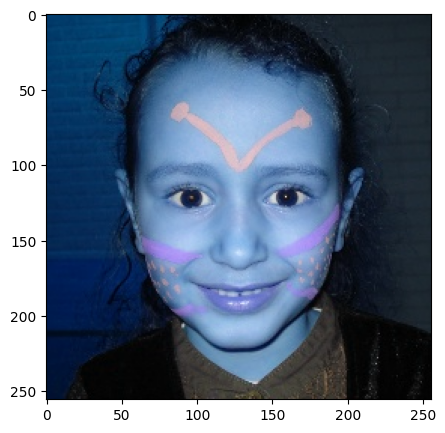

(None, (256, 256, 3))

In [121]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img)
plt.show(), img.shape

In [122]:
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


In [123]:
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import DataLoader

In [124]:
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.loc[idx, 'image']
        label = self.dataframe.loc[idx, 'label']

        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


In [125]:
train_dataset = ImageDataset(traindf_clean, transform=train_transforms)
test_dataset = ImageDataset(testdf_clean, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [126]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 256, 256])
torch.Size([32])


In [127]:
import numpy as np

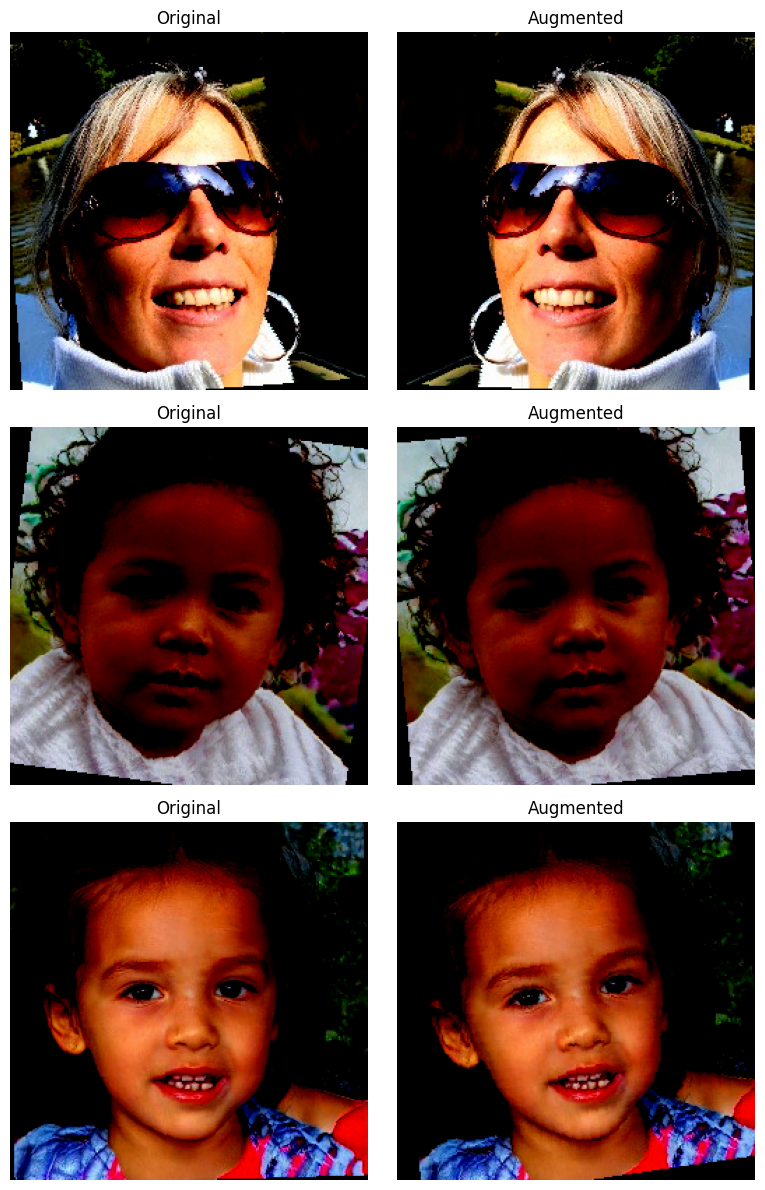

In [128]:
def display_augmented_images(dataset, num_samples=3):
    fig, axes = plt.subplots(num_samples, 2, figsize=(8, 12))

    for i in range(num_samples):
        index = np.random.randint(len(dataset))
        original_image, _ = dataset[index]

        axes[i, 0].imshow(np.transpose(original_image.numpy(), (1, 2, 0)))
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')

        augmented_image, _ = dataset[index]
        axes[i, 1].imshow(np.transpose(augmented_image.numpy(), (1, 2, 0)))
        axes[i, 1].set_title('Augmented')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

display_augmented_images(train_dataset)

In [129]:
import torch
import torch.nn as nn
import torchvision.models as models

In [130]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18(pretrained=True)

num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)

resnet18 = resnet18.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.



In [131]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=1e-4)

In [132]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss:.4f} - Accuracy: {acc:.2f}%")

    return model

In [133]:
def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    print(f"Test Accuracy: {acc:.2f}%")

In [134]:
trained_model = train_model(resnet18, train_loader, test_loader, criterion, optimizer, device, epochs=5)
evaluate_model(trained_model, test_loader, device)

Epoch [1/5] - Loss: 70.7173 - Accuracy: 86.21%
Epoch [2/5] - Loss: 29.3039 - Accuracy: 94.87%
Epoch [3/5] - Loss: 19.3721 - Accuracy: 96.69%
Epoch [4/5] - Loss: 14.7210 - Accuracy: 97.46%
Epoch [5/5] - Loss: 9.9591 - Accuracy: 98.44%
Test Accuracy: 96.63%


In [135]:
import random

In [233]:
fake_images = testdf_clean[testdf_clean['label'] == 0]['image'].tolist()
sample_image_path = random.choice(fake_images)
sample_image_path

'/content/new_dataset/rvf10k/valid/fake/QT45OHIKUQ.jpg'

In [234]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

image = Image.open(os.path.join(sample_image_path)).convert('RGB')
input_tensor = transform(image).unsqueeze(0).to(device)


In [159]:
type(image)

PIL.Image.Image

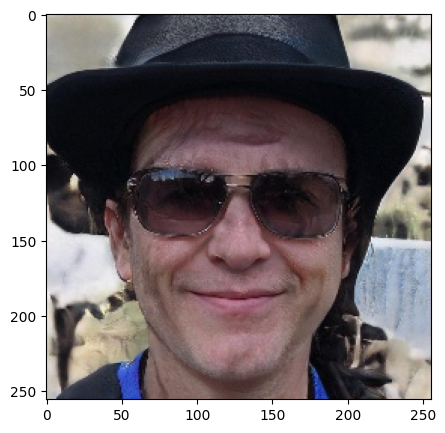

In [235]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)
plt.show()

In [237]:
resnet18.eval()
with torch.no_grad():
    output = resnet18(input_tensor)
    predicted_class = torch.argmax(output, dim=1).item()
    print(predicted_class)

print(f"What does the model say ?? {'FAKE AS F***' if predicted_class == 1 else 'REAL BRO'}")

1
What does the model say ?? FAKE AS F***


In [178]:
torch.save(resnet18.state_dict(), "resnet18_fake_spotter_binary.pth")

In [177]:
from torchvision.models import inception_v3, Inception_V3_Weights

In [203]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

weights = Inception_V3_Weights.DEFAULT
inception = inception_v3(weights=weights, aux_logits=True)

inception.fc = nn.Linear(inception.fc.in_features, 2)

if inception.aux_logits:
    inception.AuxLogits.fc = nn.Linear(inception.AuxLogits.fc.in_features, 2)

inception = inception.to(device)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 135MB/s]


In [204]:
from torchvision import transforms

transform_inception = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [205]:
train_dataset_inc = ImageDataset(traindf_clean, transform=transform_inception)
test_dataset_inc = ImageDataset(testdf_clean, transform=transform_inception)

train_loader_inc = DataLoader(train_dataset_inc, batch_size=32, shuffle=True, num_workers=2)
test_loader_inc = DataLoader(test_dataset_inc, batch_size=32, shuffle=False, num_workers=2)

In [210]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(inception.parameters(), lr=1e-4)

In [214]:
def train_inception(model, train_loader, val_loader, criterion, optimizer, device, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs, aux_outputs = model(images)
            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux_outputs, labels)
            loss = loss1 + 0.4 * loss2

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        acc = 100 * correct / total
        print(f"[{epoch+1}/{epochs}] Loss: {total_loss:.4f} - Accuracy: {acc:.2f}%")
    return model


In [212]:
def evaluate_model(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if isinstance(outputs, tuple):
                outputs = outputs[0]
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    print(f"Test Accuracy: {acc:.2f}%")


In [215]:
trained_inc = train_inception(inception, train_loader_inc, test_loader_inc, criterion, optimizer, device, epochs=5)
evaluate_model(trained_inc, test_loader_inc, device)

[1/5] Loss: 2.7350 - Accuracy: 99.83%
[2/5] Loss: 3.2886 - Accuracy: 99.66%
[3/5] Loss: 2.5282 - Accuracy: 99.74%
[4/5] Loss: 3.2795 - Accuracy: 99.66%
[5/5] Loss: 3.4893 - Accuracy: 99.67%
Test Accuracy: 98.67%


In [216]:
transform_inception = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [225]:
fake_images = testdf_clean[testdf_clean['label'] == 0]['image'].tolist()
sample_image_path = random.choice(fake_images)


image = Image.open(sample_image_path).convert('RGB')
input_tensor = transform_inception(image).unsqueeze(0).to(device)

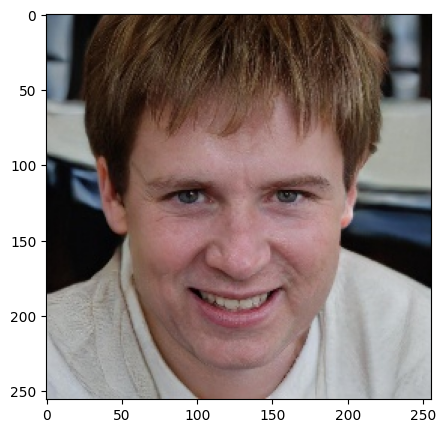

In [226]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)
plt.show()

In [227]:
inception.eval()
with torch.no_grad():
    output = inception(input_tensor)
    if isinstance(output, tuple):
        output = output[0]
    predicted_class = torch.argmax(output, dim=1).item()
    print(predicted_class)

print(f"Inception spune: {'FAKE AS F***' if predicted_class == 0 else 'REAL BRO'}")

0
Inception spune: FAKE AS F***


In [238]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [239]:
def plot_confusion_matrix(model, dataloader, device, title="Confusion Matrix"):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if isinstance(outputs, tuple):
                outputs = outputs[0]
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()


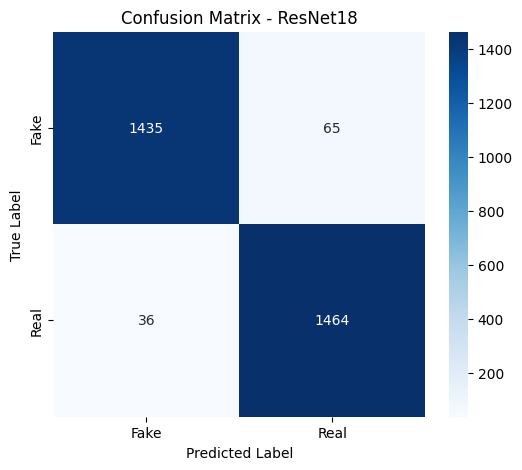

In [240]:
plot_confusion_matrix(resnet18, test_loader, device, title="Confusion Matrix - ResNet18")

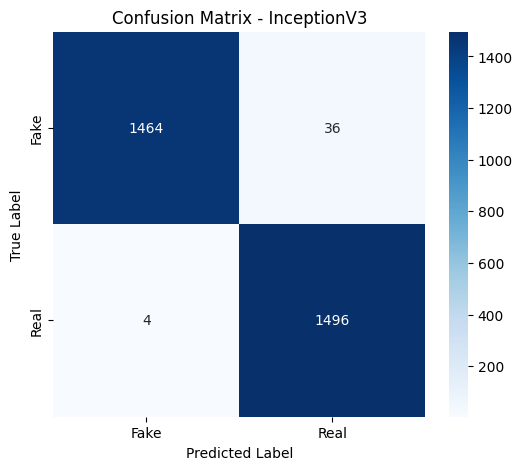

In [241]:
plot_confusion_matrix(inception, test_loader_inc, device, title="Confusion Matrix - InceptionV3")

In [242]:
torch.save(inception.state_dict(), "inception_fake_spotter_binary.pth")